In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import lightgbm as lgb
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
get_ipython().run_line_magic('matplotlib', 'inline')
df_name = input("Enter the name of the file: ")
df = pd.read_csv(df_name, sep='\t', encoding='unicode_escape')
# Dataset_08-29-2019.txt

ModuleNotFoundError: No module named 'pandas'

In [7]:
#Functions shell

def otherCap(x):
    for letter in x:
        if letter.isupper():
            return 1
    return 0

def propVow(x):
    vowels = 'aeiouAEIOU'
    numVow = 0
    for letter in x:
        if letter in vowels:
            numVow += 1
    return numVow / len(x)

word_array = df.Word.unique().tolist()

def frontWord(x):
    if x > 0:
        return word_array.index(df['Word'][x-1])
    else:
        return
def backWord(x):
    if x < len(df.index) - 1:
        return word_array.index(df['Word'][x+1])
    else:
        return

tagArray = df.Tag.unique().tolist()
def Tag2Num(x):
    return tagArray.index(x)

In [8]:
df['isFirstCap'] = df['Word'].apply(lambda x: 1 if x[0].isupper() else 0)

df['Length'] = df['Word'].apply(lambda x: len(x))

df['endY'] = df['Word'].apply(lambda x: 1 if x[-1] == 'y' else 0)

df['isNNP'] = df['POS'].apply(lambda x: 1 if x == 'NNP' else 0)

df['isJJ'] = df['POS'].apply(lambda x: 1 if x == 'JJ' else 0)

df['isCD'] = df['POS'].apply(lambda x: 1 if x == 'CD' else 0)

df['otherCap'] = df['Word'].apply(lambda x: otherCap(x))

df['endan'] = df['Word'].apply(lambda x: 1 if x[-2:len(x)] == 'an' else 0)

df['isNum'] = df['Word'].apply(lambda x: 1 if x.isnumeric() else 0)

df['endS'] = df['Word'].apply(lambda x: 1 if x[-1] == 's' else 0)

df['endish'] = df['Word'].apply(lambda x: 1 if x[-3:len(x)] == 'ish' else 0)

df['endese'] = df['Word'].apply(lambda x: 1 if x[-3:len(x)] == 'ese' else 0)

df['propVow'] = df['Word'].apply(lambda x: propVow(x))

#df['isTag'] = df['Tag'].apply(lambda x: 0 if x == 'O' else 1)
df['TagNum'] = df['Tag'].apply(lambda x: Tag2Num(x))

df['frontWord'] = df['Unnamed: 0'].apply(lambda x: frontWord(x))

df['backWord'] = df['Unnamed: 0'].apply(lambda x: backWord(x))

In [9]:
data_test = df[['isFirstCap', 'Length', 'endY', 'isNNP', 'isJJ', 'isCD', 'otherCap', 'endan',
           'isNum', 'endS', 'endish', 'endese', 'propVow', 'frontWord', 'backWord']].values
valid_test = df['TagNum'].values
light_model = lgb.Booster(model_file = 'model.txt')
y_pred2 = light_model.predict(data_test)
y_hat2 = [np.argmax(line) for line in y_pred2]
accuracy = accuracy_score(y_hat2, valid_test)
cm = confusion_matrix(valid_test, y_hat2)
print("Accuracy = " + str(accuracy))
print(cm)

Accuracy = 0.9445897129728994
[[55891    34    62    51     1    45    22    22     0     0    76     0
      8     1     3     1     0]
 [   79  1622    16    68     8   130    30    20     0     0    91     0
      1     0     0     4     1]
 [   73   205   871    24     4    33     5     1     1     0    13     0
      0     0     0     0     0]
 [   28   106     3   777     1    45    29    21     1     0    91     0
      0     1     1     2     1]
 [   29    41     2     7   216     9    16     8     1     0    82     1
      0     0     0     1     1]
 [   76   308    18   101     7   595    38    18     1     0    71     0
      0     0     1     2     1]
 [  135    52     5    42    37    28   412    38     0     0   175     0
      0     0     0     0     2]
 [  240    66     2    10     2    28     3   791     0     0     6     0
     12     0     0     0     0]
 [    5     8     2     2     1     8     1     0    25     0     1     0
      0     0     0     0     0]
 [    5

Confusion Matrix of Tag Data


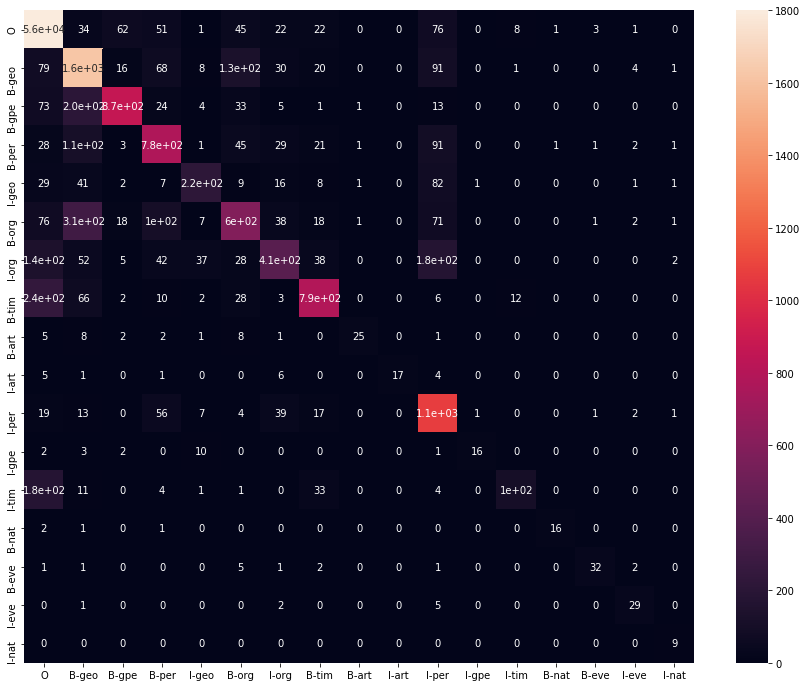

In [10]:
fig = plt.figure(figsize = (15, 12))
sn.heatmap(cm, vmin = 0, vmax = 1800, annot = True, xticklabels = tagArray, yticklabels = tagArray)
print('Confusion Matrix of Tag Data')